# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Zenari

Student name: Marco
    
ID: not enrolled yet

Pre-immatricolation number: 10703983

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
seed=4269
np.random.seed(seed)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [56 53 65 66 48 74 60 72 56 50]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


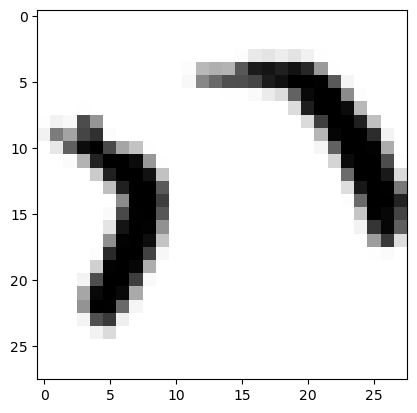

LABEL: 5
INPUT:


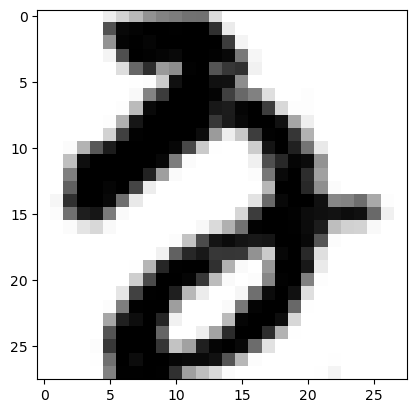

LABEL: 4
INPUT:


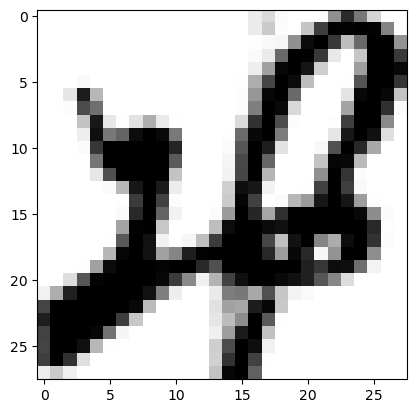

LABEL: 0
INPUT:


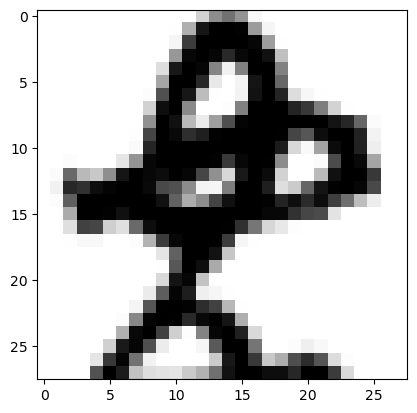

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM
svc=SVC(kernel='linear', random_state=3)
clf_linear = GridSearchCV(svc, parameters, cv = 4)
clf_linear.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')


print("Best parameters set found:")
print(clf_linear.best_params_)

print("Score with best parameters:")
print(clf_linear.best_score_)

print("All scores on the grid:")
means_linear = clf_linear.cv_results_['mean_test_score']
print(means_linear)


RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.7683333333333333
All scores on the grid:
[0.74833333 0.76833333 0.76833333 0.76833333]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

svc=SVC(kernel='poly', degree=2, random_state=3)
clf_quadratic= GridSearchCV(svc, parameters, cv = 4)
clf_quadratic.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf_quadratic.best_params_)

print("Score with best parameters:")
print(clf_quadratic.best_score_)


print("\nAll scores on the grid:")
means_quadratic = clf_quadratic.cv_results_['mean_test_score']
print(means_quadratic)

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 1}
Score with best parameters:
0.79

All scores on the grid:
[0.12333333 0.765      0.79       0.43166667 0.78833333 0.79
 0.765      0.79       0.79      ]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

svc=SVC(kernel='poly', degree=degree, random_state=3)
clf_poly= GridSearchCV(svc, parameters, cv = 4)
clf_poly.fit(X_train, y_train)


print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(clf_poly.best_params_)

print("Score with best parameters:")
print(clf_poly.best_score_)

print("\nAll scores on the grid:")
means_poly = clf_poly.cv_results_['mean_test_score']
print(means_poly)

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.7350000000000001

All scores on the grid:
[0.12333333 0.735      0.70666667 0.375      0.70833333 0.70666667
 0.70666667 0.70666667 0.70666667]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

svc=SVC(kernel='rbf', random_state=3)
clf_rbf= GridSearchCV(svc, parameters, cv = 4)
clf_rbf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf_rbf.best_params_)

print("Score with best parameters:")
print(clf_rbf.best_score_)

print("\nAll scores on the grid:")
means_rbf = clf_rbf.cv_results_['mean_test_score']
print(means_rbf)

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8216666666666667

All scores on the grid:
[0.12333333 0.25166667 0.12333333 0.12333333 0.59833333 0.785
 0.185      0.12333333 0.78166667 0.82166667 0.205      0.12333333
 0.78166667 0.82166667 0.205      0.12333333]


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

The score with best parameters is obtained with the Radial Basis Function. Using a polynomial function as kernel gives the best results when the polynomial has a low degree (ex 1 or 2).

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM=SVC(kernel='rbf', C=10, gamma=0.01, random_state=3)
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)
# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.193250


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


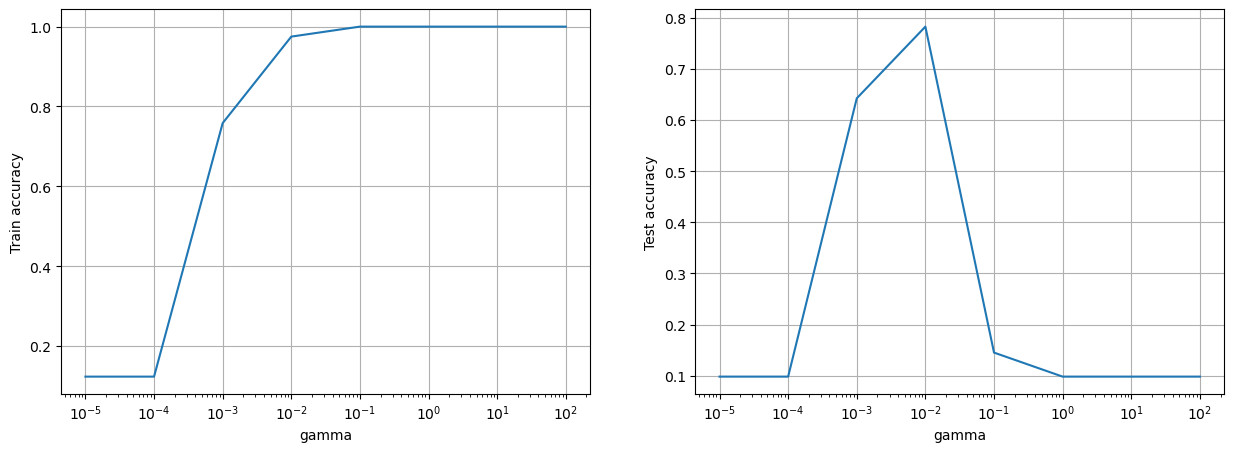

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

   
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

train_acc_list, test_acc_list=[], []

for gam in gamma_values:
    svc=SVC(kernel='rbf', C=1, gamma=gam, random_state=3)
    svc.fit(X_train, y_train)
    train_acc_list.append(svc.score(X_train, y_train))
    test_acc_list.append(svc.score(X_test, y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

The train error is zero when gamma is greather than $10^{-1}$ beacause of the overfitting. The test error is minimum when gamma is about $10^{-2}$. These trends are expected as increasing gamma we have that the training set is overfitted.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [189 223 193 195 212 217 195 198 183 195]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

parameters={'kernel':['linear', 'poly', 'rbf'], 'degree':[2,3], 'C':[0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1]}
svc=SVC(random_state=3)
clf= GridSearchCV(svc, parameters, cv = 4)
clf.fit(X_train, y_train)

best_svc=SVC(kernel=clf.best_params_['kernel'], degree=clf.best_params_['degree'], C=clf.best_params_['C'], gamma=clf.best_params_['gamma'])

best_svc.fit(X_train, y_train)

training_error = 1. - best_svc.score(X_train,y_train)
test_error = 1. - best_svc.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.114397


In [17]:
print(clf.best_params_)

{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [18]:
from sklearn import linear_model

linear_model=linear_model.LogisticRegression(C=10**6)
linear_model.fit(X_train, y_train)

training_error = 1. - linear_model.score(X_train,y_train)
test_error = 1. - linear_model.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.280724


## TO DO 9 Try  with regularization (use C=1)¶

In [19]:
from sklearn import linear_model

linear_model_lowC=linear_model.LogisticRegression(C=1, max_iter=1000)
linear_model_lowC.fit(X_train, y_train)

training_error = 1. - linear_model_lowC.score(X_train,y_train)
test_error = 1. - linear_model_lowC.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.001000
Best regularized logistic regression test error: 0.253690


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

The SVM with m=600 has less accuracy than the SVM with m=2000. This is expected as using more data improves the training. Confrontinf the SVM with the linear regression we can see that the SVM has a better accuracy, probably because the data are not linear separably.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

Clothing(?!)

Confrontation between labels:
LR 	 [6 1 2 2 4 7 1 4 1 4 1 2 1 5 1 8 1 6 5 5 0 8 4 8 2 7 7]
SVM 	 [6 1 1 2 4 7 1 4 1 4 8 8 1 5 1 8 1 6 0 8 0 8 4 6 2 7 7]
True 	 [6 1 1 2 4 7 1 9 8 4 1 2 1 5 1 8 1 6 0 8 0 8 4 7 2 7 7]
INPUT:


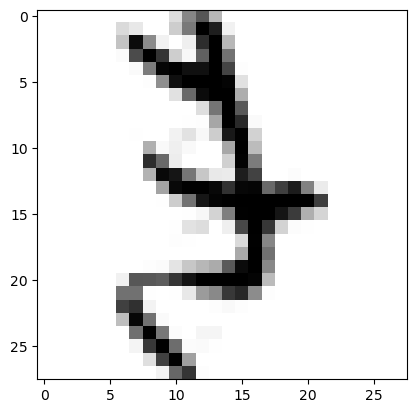

LABEL: 2
INPUT:


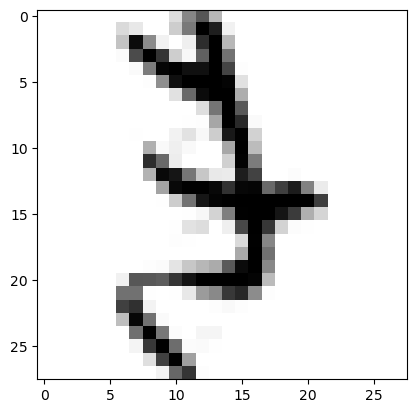

LABEL: 1
INPUT:


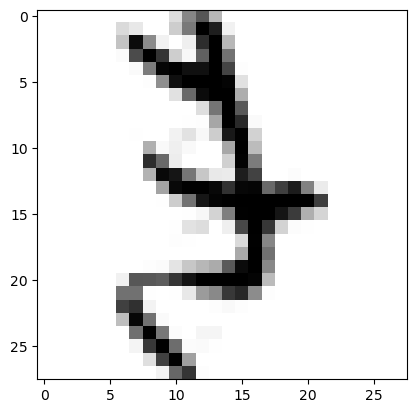

LABEL: 1


In [24]:
LR_prediction = linear_model_lowC.predict(X_test[42:69])
SVM_prediction = best_svc.predict(X_test[42:69])

print("Confrontation between labels:")

print("LR \t", LR_prediction)
print("SVM \t", SVM_prediction)
print("True \t", y_test[42:69])

plot_input(X_test[42:69], LR_prediction, 2)

plot_input(X_test[42:69], SVM_prediction,  2)

plot_input(X_test[42:69], y_test[42:69], 2)


## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [21]:
SVM_prediction=best_svc.predict(X_test)
LR_prediction=linear_model_lowC.predict(X_test)

In [22]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction, normalize=None )
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = skm.confusion_matrix(y_test, LR_prediction, normalize=None )
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5811 5777 5807 5805 5788 5783 5805 5802 5817 5805]

 Confusion matrix SVM  
 
 [[5388   12    3   30  105   59   13   97   58   46]
 [  28 5098  142   32  130   31  132    4   60  120]
 [   0  124 4845   90   67   39  355   17  194   76]
 [  10   66  191 5262   66   77   13   27   72   21]
 [ 199   73   90   82 5022   20   98   28   80   96]
 [  58   51  152  143  101 5160   34   25   43   16]
 [   8  146  314   33  197   18 5002   40   32   15]
 [  54   27   67   51  229   19   65 5215   35   40]
 [  47  207   64   42   42  108  173    3 5099   32]
 [  22  130  138   12  126   22   17   12   52 5274]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.01 0.02 0.01 0.   0.02 0.01 0.01]
 [0.   0.88 0.02 0.01 0.02 0.01 0.02 0.   0.01 0.02]
 [0.   0.02 0.83 0.02 0.01 0.01 0.06 0.   0.03 0.01]
 [0.   0.01 0.03 0.91 0.01 0.01 0.   0.   0.01 0.  ]
 [0.03 0.01 0.02 0.01 0.87 0.   0.02 0.   0.01 0.02]
 [0.01 0.01 0.03 0.02 0.02 0.89 0.01 0.   0.0

In [23]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
#Already done above


## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


In the confusion matrix we can see that the SVM accuracy is better than the LR accuracy. In particular we can note that some classes have lower accuracies than the others probably because they can be confused by the algorithm.